In [1]:
#Updated 4/16/2024

import csv

myFile = open('lockedEndList.txt', "r") 
data = myFile.read()
lockedEndList = data.split("\n")
myFile.close()

myFile = open('lockedDerivedAmountList.txt', "r")
data = myFile.read()
lockedDerivedAmountList = data.split("\n")
myFile.close()

In [2]:
lockedEndListFormatted = []
for i in range(len(lockedEndList)):
    if lockedEndList[i] == '':
        continue
    if lockedEndList[i] == '0':
        lockedEndListFormatted.append(0)
    else:
        lockedEndListFormatted.append((int(lockedEndList[i])/86400-19723))

print(len(lockedEndListFormatted)) #should be equal to lockedDerivedAmountListFormatted
print(min(lockedEndListFormatted)) #for the plot axis
print(max(lockedEndListFormatted)) #for the plot axis

1201
-375.0
213.0


In [3]:
lockedDerivedAmountListFormatted = []
for i in range(len(lockedDerivedAmountList)):
    if lockedEndList[i] == '':
        continue
    else:
        lockedDerivedAmountListFormatted.append(int(lockedDerivedAmountList[i]) * 10**-18)

print(len(lockedDerivedAmountListFormatted)) #should be equal to lockedEndListFormatted
print(min(lockedDerivedAmountListFormatted)) #for the plot axis
print(max(lockedDerivedAmountListFormatted)) #for the plot axis

1201
0.0
13507347.947150584


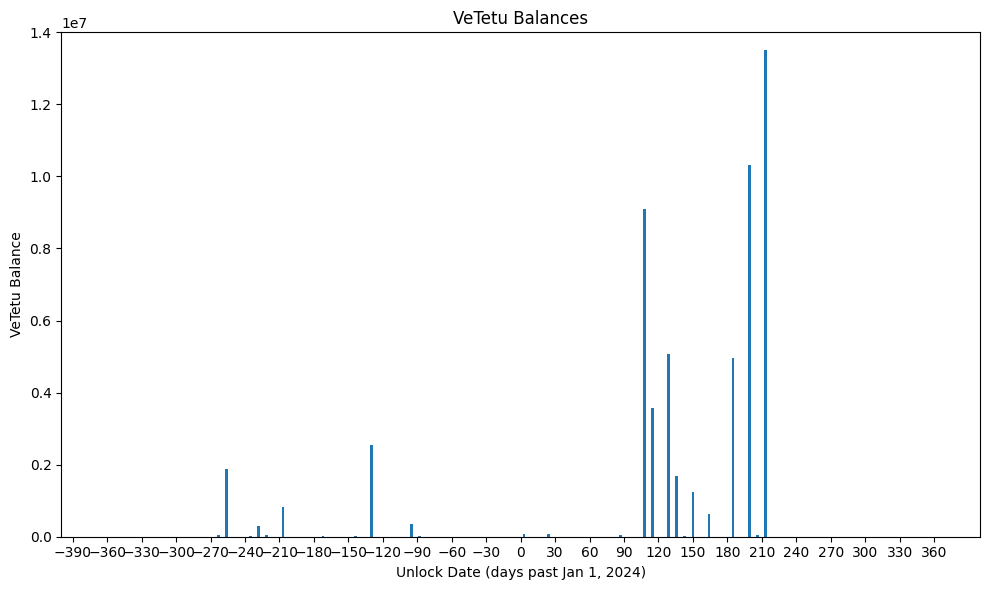

In [9]:
import matplotlib.pyplot as plt
import numpy as np

x_axis = lockedEndListFormatted
y_axis = lockedDerivedAmountListFormatted

bar_width = np.min(np.diff(np.unique(x_axis))) * 0.8

plt.figure(figsize=(10, 6))
plt.bar(x_axis, y_axis, width=bar_width, align='center')

plt.axis([-400, 400, 0, 14000000])
plt.title('VeTetu Balances')
plt.xlabel('Unlock Date (days past Jan 1, 2024)')
plt.ylabel('VeTetu Balance')
plt.xticks(np.arange(-390,390,30))

plt.tight_layout()
plt.show()

In [11]:
largeNFTList = []
largeNFTListInt = []
unlockedList = []
unlockedListInt = []
print('Large Balance NFTs:\n')
for i in range(len(lockedDerivedAmountListFormatted)):
    if lockedDerivedAmountListFormatted[i] > 100000:
        print('ID: ' + str(i) + ', ' + str(lockedDerivedAmountListFormatted[i]) + ', date: ' + str(lockedEndListFormatted[i]))
        largeNFTList.append(str(lockedDerivedAmountListFormatted[i]) + ', date: ' + str(lockedEndListFormatted[i]))
        largeNFTListInt.append(lockedDerivedAmountListFormatted[i])
    if lockedEndListFormatted[i] < 136:
        unlockedListInt.append(lockedDerivedAmountListFormatted[i])
        if lockedDerivedAmountListFormatted[i] > 100000:
            unlockedList.append('ID: ' + str(i) + ', ' + str(lockedDerivedAmountListFormatted[i]) + ', date: ' + str(lockedEndListFormatted[i]))
print('Total Balance: ' + str(sum(lockedDerivedAmountListFormatted)) + '\n')
print('Total Balance Greater than 100,000: ' + str(sum(largeNFTListInt)) + '\n')
print('Unlocked:')
for item in unlockedList:
    print(item)
print('Total Unlocked: ' + str(sum(unlockedListInt)) + '\n')
print('Percent Unlocked: ' + str(sum(unlockedListInt)/sum(lockedDerivedAmountListFormatted)*100))


Large Balance NFTs:

ID: 8, 5344249.610559565, date: 213.0
ID: 14, 8498459.87667031, date: 213.0
ID: 18, 1682191.9949332892, date: 136.0
ID: 20, 1048954.617678732, date: 213.0
ID: 27, 106782.43944196783, date: 213.0
ID: 36, 503846.81379626144, date: 213.0
ID: 57, 10326289.572917467, date: 199.0
ID: 66, 6233401.400433601, date: 213.0
ID: 87, 2555202.0757717346, date: -130.0
ID: 124, 714251.5594549646, date: 213.0
ID: 156, 154348.46141932244, date: 213.0
ID: 161, 307005.208700423, date: -228.0
ID: 168, 347868.7304337405, date: -95.0
ID: 304, 259026.28714599373, date: -207.0
ID: 422, 837139.9586377093, date: -207.0
ID: 966, 1875591.1917993631, date: -256.0
ID: 1064, 7527686.893828427, date: 213.0
ID: 1065, 7261676.950776717, date: 213.0
ID: 1066, 7490680.8725809585, date: 213.0
ID: 1070, 13507347.947150584, date: 213.0
ID: 1071, 5084179.400084896, date: 129.0
ID: 1082, 1244298.5649626406, date: 150.0
ID: 1084, 462043.49759536993, date: 213.0
ID: 1085, 284476.8919382601, date: 185.0
ID: 10